# NAME : G.L.K RAGHAVENDRA VARMA

#  ML-MAJOR-MAY-ML052B15

In [185]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# in this one,gender is the dependent variable


In [186]:
#importing data with latin-1 encoding because there are some special characters
dataset = pd.read_csv("Information.csv",encoding='latin-1')
#first five rows of the dataset
dataset.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229096808449/fYvzqXN7_normal.png,0,FFFFFF,Robbie E Responds To Critics After Win Against Eddie Edwards In The #WorldTitleSeries https://t.co/NSybBmVjKZ,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221532700673/WW16tBbU_normal.jpeg,0,C0DEED,ÛÏIt felt like they were my friends and I was living the story with themÛ https://t.co/arngE0YHNO #retired #IAN1 https://t.co/CIzCANPQFz,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418249658368/SBLCXdF7_normal.png,1,C0DEED,i absolutely adore when louis starts the songs it hits me hard but it feels good,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936/IMG_8444_normal.JPG,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you use @IFTTT?! Don't typically see an advanced user on the @PGATOUR! https://t.co/H68ou5PE9L,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871032446976/AOfpk-mr_normal.jpeg,0,0,Watching Neighbours on Sky+ catching up with the Neighbs!! Xxx _Ù÷Ä_Ù÷Ä_Ù÷Ä_ÙÔÎ_ÙÈ_ÙÔ_ÙÈ Xxx,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [187]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20000 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             20050 non-null  object 
 14  name                   20050 non-null  object 
 15  pr

In [188]:
dataset.shape

(20050, 26)

In [189]:
dataset['gender'].value_counts()

female     6700
male       6194
brand      5942
unknown    1117
Name: gender, dtype: int64

In [190]:
dataset.drop(['_unit_id','_golden','_unit_state','_trusted_judgments','_last_judgment_at','profile_yn','profile_yn:confidence','created','retweet_count','tweet_count','tweet_created','tweet_id','tweet_location','user_timezone','fav_number','profile_yn_gold','profileimage','tweet_coord'], axis=1, inplace= True)
dataset.head()

,gender,gender:confidence,description,gender_gold,link_color,name,sidebar_color,text
0,male,1.0000,i sing my own rhythm.,NaN,08C2C2,sheezy0,FFFFFF,Robbie E Responds To Critics After Win Against Eddie Edwards In The #WorldTitleSeries https://t.co/NSybBmVjKZ
1,male,1.0000,I'm the author of novels filled with family drama and romance.,NaN,0084B4,DavdBurnett,C0DEED,ÛÏIt felt like they were my friends and I was living the story with themÛ https://t.co/arngE0YHNO #retired #IAN1 https://t.co/CIzCANPQFz
2,male,0.6625,louis whining and squealing and all,NaN,ABB8C2,lwtprettylaugh,C0DEED,i absolutely adore when louis starts the songs it hits me hard but it feels good
3,male,1.0000,"Mobile guy. 49ers, Shazam, Google, Kleiner Perkins, Yahoo!, Sprint PCS, AirTouch, Air Force. Stanford GSB, UVa. Dad, Husband, Brother. Golfer.",NaN,0084B4,douggarland,C0DEED,Hi @JordanSpieth - Looking at the url - do you use @IFTTT?! Don't typically see an advanced user on the @PGATOUR! https://t.co/H68ou5PE9L
4,female,1.0000,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs The Best BAND Xxxx Thank you Kaiser Chiefs for an incredible year of gigs and memories to cherish always :) Xxxxxxx,NaN,3B94D9,WilfordGemma,0,Watching Neighbours on Sky+ catching up with the Neighbs!! Xxx _Ù÷Ä_Ù÷Ä_Ù÷Ä_ÙÔÎ_ÙÈ_ÙÔ_ÙÈ Xxx


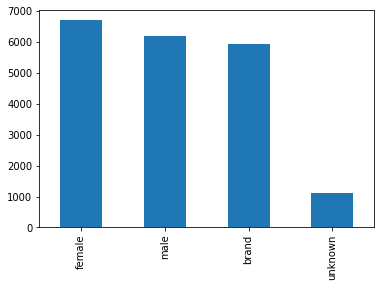

In [191]:
dataset.gender.value_counts()
dataset.gender.value_counts().plot(kind='bar')
#Below graph shows number of male,female,brand,unknown tweeters in the dataset.

here,i only consider male, female and brand categories 

# Data Analysis(Feature selection and feature engineering)
# 1. Link_color and Sidebar_color Features Exploration

Exploring the features "sidebar color" and "link color" for the three gender categories male, female and brand

In [203]:
# Defining the function to return values from link_color and sidebar_color for each gender category
def plot_color_features(data, feature, toRemove):
    # Selecting columns from the data
    dataset_col = dataset.loc[:, ['gender:confidence', 'gender', feature]]
    
    # Selecting rows where gender:confidence >= 1 and removing values like 7.60E+42
    datasetcolFiltered = dataset_col[(dataset_col['gender:confidence'] >= 1) &
                         ((dataset_col[feature]).str.contains('E\+') != True)]
    
    # Segregating data based on the gender category
    Male_data = datasetcolFiltered[datasetcolFiltered['gender'] == 'male']
    Female_data = datasetcolFiltered[datasetcolFiltered['gender'] == 'female']
    Brand_data = datasetcolFiltered[datasetcolFiltered['gender'] == 'brand']
    
    # To plot the graph, I need top 20 colors along with its count for each gender category
    color_male = Male_data[feature]
    color_female = Female_data[feature]
    color_brand = Brand_data[feature]
    
    # Creating list of lists by using flatten method
    male_list = list(color_male.values.flatten())
    female_list = list(color_female.values.flatten())
    brand_list = list(color_brand.values.flatten())
    
    # Only Selecting top 20 colors used by each gender and creating a list which includes the color and the count
    color_male = Counter(color_male).most_common(21)
    color_female = Counter(color_female).most_common(21)
    color_brand = Counter(color_brand).most_common(21)
    
    # Taking list of colors for each gender category
    # Not selecting the first most common color from each of the gender category
    male_colors = [x[0] for x in color_male[toRemove:]] 
    female_colors = [x[0] for x in color_female[toRemove:]] 
    brand_colors = [x[0] for x in color_brand[toRemove:]]
    
    # Taking list of counts for each gender category
    # Not Selecting the first most common number because the most common color is blue for all the categories and it doesnt give much value
    male_num = [x[1] for x in color_male[toRemove:]] 
    female_num = [x[1] for x in color_female[toRemove:]] 
    brand_num = [x[1] for x in color_brand[toRemove:]]
    
    # Converting hex codes into consistent format
    # 1. Prefixing hex code with # and adding six zeros to it
    # 2. Selecting 6 characters from the newly converted hex code
    Hexcolor_Male = ['#' + x + '000000' for x in male_colors]
    Hexcolor_Male = [x[0:7] for x in Hexcolor_Male]
    Hexcolor_Female = ['#' + x + '000000' for x in female_colors]
    Hexcolor_Female = [x[0:7] for x in Hexcolor_Female]
    Hexcolor_Brand = ['#' + x + '000000' for x in brand_colors]
    Hexcolor_Brand = [x[0:7] for x in Hexcolor_Brand]
    
    return male_num, female_num, brand_num, Hexcolor_Male, Hexcolor_Female, Hexcolor_Brand

In [204]:
# calling function plot_color_features and removing 1 most common occuring color from each category
male_num, female_num, brand_num, Hexcolor_Male, Hexcolor_Female, Hexcolor_Brand = plot_color_features(dataset, 'link_color', 1)

In [205]:
col_range = list(range(len(male_num)))

# A. Exploring link_color for each of the gender category
# Plotting the graph of the link_color for the Male gender

Text(0.5, 1.0, 'Link colors which Male gender prefer ')

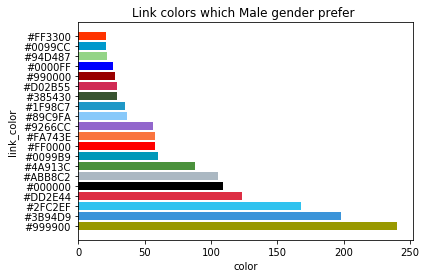

In [206]:
plt.barh(col_range,male_num,
                label = 'Male', color = Hexcolor_Male)
plt.yticks(col_range, Hexcolor_Male)
plt.xlabel('color')
plt.ylabel('link_color')
plt. title('Link colors which Male gender prefer ')

# Plotting the graph of the link_color for the Female gender

Text(0.5, 1.0, 'Link colors which Female gender prefer')

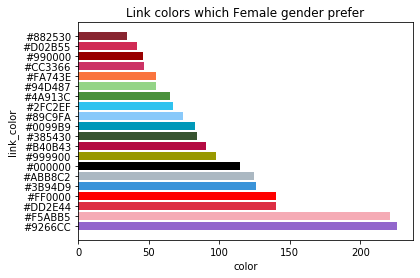

In [207]:
plt.barh(col_range,female_num,
                label = 'Female', color = Hexcolor_Female)
plt.yticks(col_range, Hexcolor_Female)
plt.xlabel('color')
plt.ylabel('link_color')
plt. title('Link colors which Female gender prefer')

# Plotting the graph of the link_color for the Brand

Text(0.5, 1.0, 'Link colors which Brand prefer')

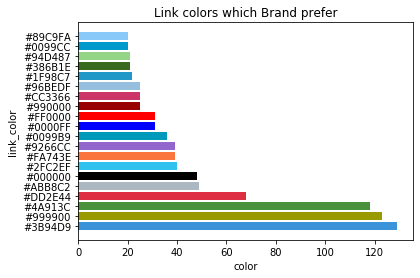

In [208]:
plt.barh(col_range,brand_num,
                label = 'Brand', color = Hexcolor_Brand)
plt.yticks(col_range, Hexcolor_Brand)
plt.xlabel('color')
plt.ylabel('link_color')
plt. title('Link colors which Brand prefer')

# B. Exploring sidebar_color for each of the gender category

In [209]:
# calling function plot_color_features and removing 4 most common occuring color from each category
male_num_sc, female_num_sc, brand_num_sc, Hexcolor_Male_sc, Hexcolor_Female_sc, Hexcolor_Brand_sc = plot_color_features(dataset, 'sidebar_color', 4)

In [210]:
col_range_sc = list(range(len(male_num_sc)))

# Plotting the graph of the side_color for the Male gender

Text(0.5, 1.0, 'Sidebar colors which Male gender prefer')

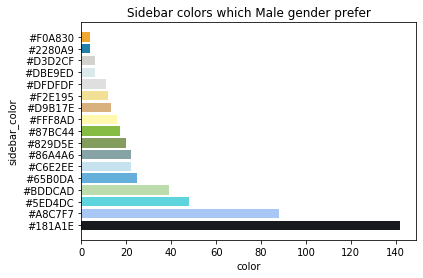

In [211]:
plt.barh(col_range_sc,male_num_sc,label = 'Male', color = Hexcolor_Male_sc)
plt.yticks(col_range_sc, Hexcolor_Male_sc)
plt.xlabel('color')
plt.ylabel('sidebar_color')
plt. title('Sidebar colors which Male gender prefer')

# Plotting the graph of the sidebar_color for the Female gender

Text(0.5, 1.0, 'Sidebar colors which Female gender prefer')

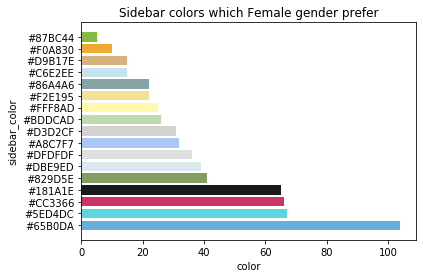

In [212]:
plt.barh(col_range_sc,female_num_sc,label = 'Female', color = Hexcolor_Female_sc)
plt.yticks(col_range_sc, Hexcolor_Female_sc)
plt.xlabel('color')
plt.ylabel('sidebar_color')
plt. title('Sidebar colors which Female gender prefer')

# Plotting the graph of the sidebar_color for the Brand 

Text(0.5, 1.0, 'Sidebar colors which Brands prefer')

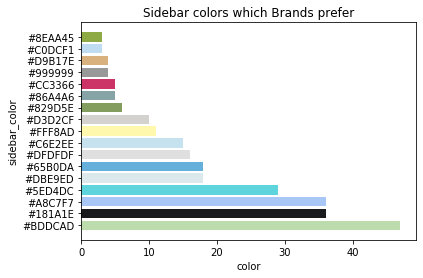

In [213]:
plt.barh(col_range_sc,brand_num_sc,
                label = 'Brand', color = Hexcolor_Brand_sc)
plt.yticks(col_range_sc, Hexcolor_Brand_sc)
plt.xlabel('color')
plt.ylabel('sidebar_color')
plt. title('Sidebar colors which Brands prefer')

# Observations from the colors Features exploration

#### 1) Female prefer 'pink' and 'purple' as their link_color
#### 2) Male prefer 'green' and 'blue' as their link_color
#### 3) Brand prefer 'blue' and 'green' as their link_color
#### 4) Male prefer 'black' and 'blue' as their side_bar_color
#### 5) female prefer 'blue' as their side_bar_color
#### 6) Brand prefer 'green' and 'black' as their side_bar_color
#### 7) Users change link color more than the side bar color

# 2. Text and Description Features Exploration
 

here we explore which words are used mostly by which genders

In [214]:
#replacing NA with a gap
dataset.description = dataset.description.fillna('')

In [215]:
import string
import re

In [216]:
def clean(s):
    s = str(s)        # Converting to string
    s = s.lower()     # Normalizing text by converting everything to lower case
    
    # Removing characters that are non-alphanumeric
    s = re.sub('https://t.co/\w+', ' ',s)
    s = re.sub('\s\W',' ',s) # Replacing one whitespace followed by one non-alphanumeric character with ' '
    s = re.sub('\W,\s', ' ', s) # Replacing one non-alphanumeric character  followed by comma and one whitespace with ' '
    s = re.sub("\d+",' ',s)     # Removing 1 or more digits
    s = re.sub('\s+', ' ', s)   # Removing 1 or more spaces from the text
    s = re.sub('[!#?$@_%]', ' ', s) # Removing !, @, #, $, _ from the string
    s = s.replace(',', ' ')
    s = s.replace('[\W*]', ' ')
    return s

In [217]:
dataset['text_normalized'] = [clean(text) for text in dataset['text']]
dataset['desc_normalized'] = [clean(desc) for desc in dataset['description']]
pd.options.display.max_rows
pd.set_option('display.max_colwidth', -1)

dataset['text_normalized']

0        robbie e responds to critics after win against eddie edwards in the worldtitleseries                             
1        ûïit felt like they were my friends and i was living the story with themû retired ian                         
2        i absolutely adore when louis starts the songs it hits me hard but it feels good                                 
3        hi jordanspieth looking at the url do you use ifttt   don't typically see an advanced user on the pgatour        
4        watching neighbours on sky+ catching up with the neighbs   xxx  ù÷ä ù÷ä ù÷ä ùôî ùè ùô ùè xxx                  
                                                      ...                                                                 
20045     lookupondeath ..fine  and i'll drink tea too. i love you.                                                       
20046    greg hardy you a good player and all but don't get in the face of dez bryant. learn your place mane.             
20047    you can

In [218]:
dataset[dataset['link_color'].str.contains('E\+') == True]['link_color'].shape

(34,)

In [219]:
# Putting all the profile description and the tweets itself in one string for each user
datasetText = dataset
datasetText['all_text'] =datasetText['text_normalized'].str.cat(datasetText['desc_normalized'],sep=' ')

# Selecting rows where the confidence in gender is 1 and gender categories are female, male and brand
# Since link_color column contains values with "E" , eliminating such values
datasetText = datasetText[(datasetText['gender:confidence']==1)&(datasetText['gender']!='unknown')]

In [220]:
datasetText.shape

(13804, 11)

In [221]:
male = datasetText[datasetText['gender'] == 'male']
female = datasetText[datasetText['gender'] == 'female']
brand = datasetText[datasetText['gender'] == 'brand']

In [222]:
#tokenization
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', strip_accents = 'unicode')
male.shape

(4653, 11)

# male users

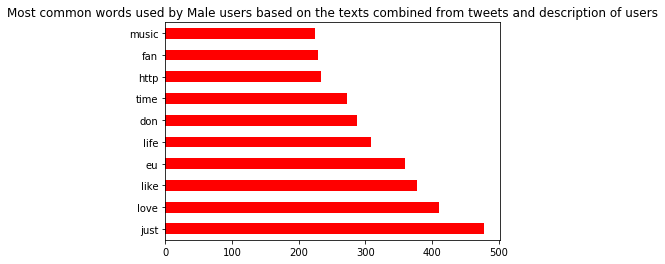

In [223]:
cvec.fit(male['all_text'])
male_dataset = pd.DataFrame(cvec.transform(male['all_text']).todense(),columns = cvec.get_feature_names())
male_word_counts = male_dataset.sum(axis=0)
male_word_counts.sort_values(ascending=False).head(20)
male_word_counts.sort_values(ascending= False).head(10).plot(kind = 'barh',title = 'Most common words used by Male users based on the texts combined from tweets and description of users',color= 'red')

# female users

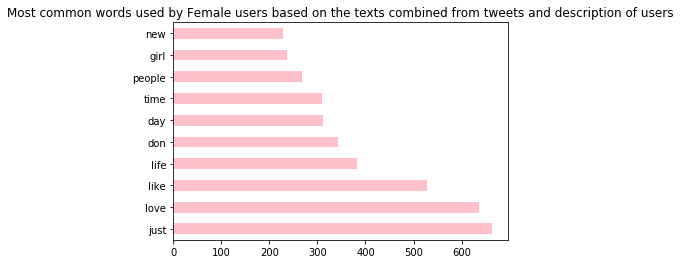

In [224]:
cvec.fit(female['all_text'])
female_dataset = pd.DataFrame(cvec.transform(female['all_text']).todense(),columns = cvec.get_feature_names())
female_word_counts = female_dataset.sum(axis=0)
female_word_counts.sort_values(ascending=False).head(20)
female_word_counts.sort_values(ascending= False).head(10).plot(kind = 'barh',title = 'Most common words used by Female users based on the texts combined from tweets and description of users', color = 'pink')

# brands

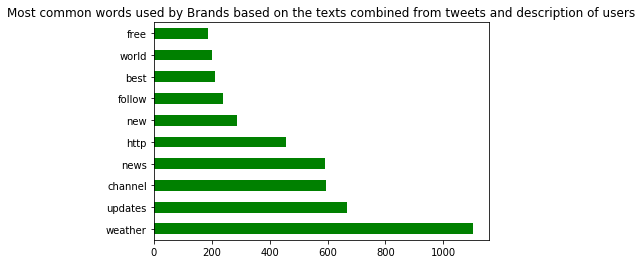

In [225]:
cvec.fit(brand['all_text'])
brand_dataset = pd.DataFrame(cvec.transform(brand['all_text']).todense(),columns = cvec.get_feature_names())
brand_word_counts = brand_dataset.sum(axis=0)
brand_word_counts.sort_values(ascending=False).head(20)
brand_word_counts.sort_values(ascending= False).head(10).plot(kind = 'barh',title = 'Most common words used by Brands based on the texts combined from tweets and description of users', color = 'green')

# Observations:

#### The results from the text features exploration are not quite conclusive when compared with results obtained from the colors features exploration.
#### Most used words used by male and female gender, are very similar words such as "just", "like", "love" .
#### Brands tends to use the words "weather", "channel" "updates" and "news" more than regular male and female users. This means that we have probably many information or weather channels accounts in our dataset. Also, the usage of the word "http" decribes that brands tend to post more links than standard users.

#  Machine learning Modelling 

### performing following steps

###### 1) Creating dummy variables for gender attribute in the dataset.
###### 2) Splitting data into training and test set by using 60:40
###### 3) running the following models on the training data and predicting on the test data
######     * SVC
######     * KNeighborsClassifier
######     * LogisticRegression    
###### 4) Evaluate model based on Accuracy.

In [226]:
from sklearn import linear_model, metrics
from sklearn import naive_bayes
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [227]:
models = [linear_model.LogisticRegression(),KNeighborsClassifier(),SVC()]

In [228]:
#training
def eval_model(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = model.score(x_test,y_test)
    return acc

In [229]:
# Defining a function for tokenization
def bag_of_words_cal(text):
    vectorizer = CountVectorizer(stop_words='english',strip_accents = 'unicode')
    vectors = vectorizer.fit_transform(text)
    return vectors

#### A. Evaluating the relationship between link_color and user's gender 

In [230]:
from sklearn import linear_model, metrics
from sklearn import naive_bayes
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Using feature link_color as we saw from the visualizations that users tend to change link_color more than the sidebar color
dataset_col = dataset.loc[:, ['gender:confidence', 'gender', 'link_color']]#, 'sidebar_color']]

# Selecting rows where gender:confidence >= 1 and removing values like 7.60E+42
datasetcolFiltered = dataset_col[(dataset_col['gender:confidence'] >= 1) & ((dataset_col['link_color']).str.contains('E\+') != True)]

bow = bag_of_words_cal(datasetcolFiltered['link_color'])
X = bow
 
y = LabelEncoder().fit_transform(datasetcolFiltered['gender'])

# Listing the classifiers I want to test the data on

In [231]:
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.4,
                                                    stratify = y,
                                                    random_state = 123)

In [232]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8340, 2290)
(5560, 2290)
(8340,)
(5560,)


#### Baseline Model - link_color

Calculating the baseline model by predicting the most frequently occuring gender class in the dataset.

In [233]:
from cytoolz import identity
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

base_model = make_pipeline(CountVectorizer(analyzer=identity), DummyClassifier('most_frequent'))     
base_score = cross_val_score(base_model,datasetcolFiltered['link_color'], 
                             datasetcolFiltered['gender'], cv=3, n_jobs=-1)

In [234]:
base_score.mean()

0.38546762988913513

The accuracy of baseline model is 38.52%

#### Results for link_color feature

In [235]:
#for ignoring future warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

results_lc =  pd.Series([eval_model(model) for model in models], 
                     index = ['logit', 'knn', 'svc'])

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [236]:
print(results_lc)

logit    0.436511
knn      0.421223
svc      0.436871
dtype: float64


It seems that svc model is performing better when link_color feature is used to predict the gender.

#### Plotting the bar plot for accuracies obtained for link_color feature

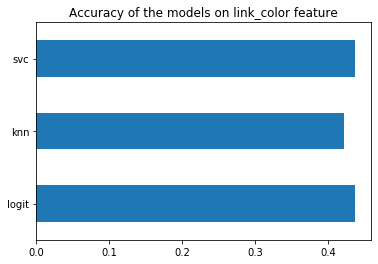

In [237]:
mse_model = []
acc_model = []
for i in range(3):
    acc = results_lc[i]
    acc_model.append(acc)
acc_model = pd.Series(acc_model, index = ['logit', 'knn', 'svc'])
acc_model.plot(kind = 'barh', title = 'Accuracy of the models on link_color feature')    

### B. Evaluating the relationship between sidebar_color and user's gender

In [238]:
from sklearn import linear_model, metrics
from sklearn import naive_bayes
from sklearn.pipeline import make_pipeline

dataset_col = dataset.loc[:, ['gender:confidence', 'gender', 'sidebar_color']]

# Selecting rows where gender:confidence >= 1 and removing values like 7.60E+42
datasetcolFiltered = dataset_col[(dataset_col['gender:confidence'] >= 1) & ((dataset_col['sidebar_color']).str.contains('E\+') != True)]

# splitting data into X and y

bow = bag_of_words_cal(datasetcolFiltered['sidebar_color'])
X = bow

y = LabelEncoder().fit_transform(datasetcolFiltered['gender'])

# Listing the classifiers I want to test the data on

In [239]:
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    stratify = y,
                                                    random_state = 123)

In [240]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(9744, 473)
(4176, 473)
(9744,)
(4176,)


#### Baseline Model - sidebar_color

Calculating the baseline model by predicting the most frequently occuring gender class in the dataset.

In [241]:
base_model = make_pipeline(CountVectorizer(analyzer=identity), DummyClassifier('most_frequent'))     
base_score = cross_val_score(base_model,datasetcolFiltered['sidebar_color'], 
                             datasetcolFiltered['gender'], cv=3, n_jobs=-1)

In [242]:
base_score.mean()

0.3852729885057471

The accuracy of baseline model is 38.52%

#### Results for sidebar_color feature

In [243]:
results_sc =  pd.Series([eval_model(model) for model in models], 
                     index = ['logit', 'knn', 'svc'])

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [244]:
print(results_sc)

logit    0.410920
knn      0.349856
svc      0.410920
dtype: float64


It seems that Logistic Regression and svm models are performing better when sidebar_color feature is used to predict the gender.

#### Plotting the bar plot for accuracies obtained for sidebar_color feature

In [245]:
mse_model = []
acc_model = []
for i in range(3):
    acc = results_sc[i]
    acc_model.append(acc)

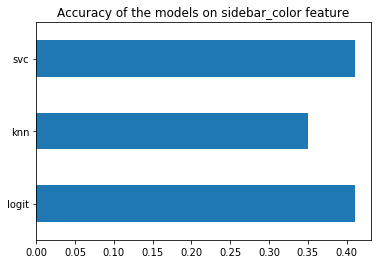

In [246]:
acc_model = pd.Series(acc_model, index = ['logit', 'knn', 'svc'])
acc_model.plot(kind = 'barh', title = 'Accuracy of the models on sidebar_color feature')

## Conclusion: 
It can be observed that all the models yield approximately the same accuracy around 30-42% for both the link_color and sidebar_color features. 41% is not significant improvement in prediction of user's gender since baseline model is predicting with 38% accuracy.

Hence, I would explore texts of the user to see if the texts are providing better results

## How well does tweets and profile descriptions predict users gender?

In [247]:
datasetTextmod = datasetText

### A. Considering both description and tweets text together to evaluate the impact

In [249]:
bow = bag_of_words_cal(datasetTextmod['all_text'])
X = bow
y = LabelEncoder().fit_transform(datasetTextmod['gender'])

#### Baseline Model

In [250]:
from cytoolz import identity
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
base_model_t = make_pipeline(CountVectorizer(analyzer=identity), DummyClassifier('most_frequent'))     
base_score_t = cross_val_score(base_model, datasetTextmod['all_text'], datasetTextmod['gender'], cv=5, n_jobs=-1)

In [251]:
base_score_t.mean()

0.3888003716359857

The accuracy of baseline model after combining texts of both the profile description and tweets is 38.88%

In [252]:
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.4,
                                                    stratify = y,
                                                    random_state = 123)

#### Results for both the text (tweet and profile description)

In [253]:
results_text =  pd.Series([eval_model(model) for model in models], 
                     index = ['logit', 'knn', 'svc'])

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [254]:
print(results_text)

logit    0.640710
knn      0.434806
svc      0.639261
dtype: float64


Logistic Regression is performing best with 60.43% accuracy

#### Plotting bar plot for accuracy

In [255]:
mse_model_text = []
acc_model_text = []
for i in range(3):
    acc = results_text[i]
    acc_model_text.append(acc)

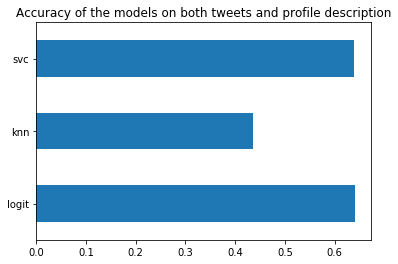

In [256]:
acc_model_text = pd.Series(acc_model_text, index = ['logit', 'knn', 'svc'])
acc_model_text.plot(kind = 'barh', title = 'Accuracy of the models on both tweets and profile description')

# Conclusion: